<a href="https://colab.research.google.com/github/Khatha11/Airbnb-Project/blob/main/Telco%20Customer%20Churn%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Telco Customer Churn Analysis\**




**About the Dataset**

The dataset comes from a telecom company and contains information about 7,043 customers.

Each row = one customer, with details about their demographics, services, account info, and whether they churned.

The main goal is to predict customer churn (whether a customer leaves the company).

*Key Features*

**Customer Demographics**

gender, seniorcitizen, partner, dependents.

**Services Signed Up**

phoneService, multipleLines, internetService (DSL/Fiber/None).

onlineSecurity, techSupport, streamingTV, streamingMovies.

**Account Information**

contract (Month-to-month, One year, Two year).

paperlessBilling, paymentMethod.

tenure (number of months with the company).

monthlyCharges, totalCharges.

**Target Column**

Churn → “Yes” or “No” (did the customer leave?).

This dataset is all about understanding customer behavior and predicting who will leave, using demographics, services, billing, and contract info.

In [1]:
import pandas as pd
import numpy as np

In [7]:
from google.colab import files

uploaded = files.upload("Telco-Customer-Churn.csv")

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv/Telco-Customer-Churn.csv


In [11]:
# Load dataset
df = pd.read_csv("Telco-Customer-Churn.csv/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
print(df.shape)    # rows, columns
print(df.columns)  # list of all column names

(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [13]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [14]:
# 1. Remove duplicates
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicates before: 0


In [15]:
# 2. Standardize column names (snake_case)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [16]:
# 3. Convert data types
df["totalcharges"] = pd.to_numeric(df["totalcharges"], errors="coerce")

In [20]:
# 4. Handle missing values
print(df.isna().sum())
df["totalcharges"].fillna(df["totalcharges"].median(), inplace=True)

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64


/tmp/ipython-input-1055167057.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["totalcharges"].fillna(df["totalcharges"].median(), inplace=True)


In [21]:
# 5. Encode target column
df["churn_flag"] = df["churn"].map({"Yes":1, "No":0})

Storytelling / EDA Questions

1. Overall churn rate

In [22]:
churn_rate = df["churn_flag"].mean()
print(f"Overall churn rate: {churn_rate:.1%}")

Overall churn rate: 26.5%


26% of customers left (about 1 in 4).

This is a significant business problem in telecom.

2. Churn by contract type

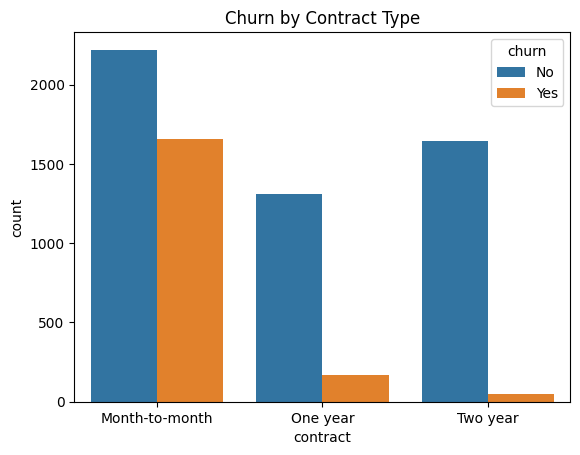

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="contract", hue="churn")
plt.title("Churn by Contract Type")
plt.show()

Month-to-month contracts → churn rate 43%.

Two-year contracts → churn rate 5%.

Longer contracts strongly reduce churn.

3. Churn by tenure

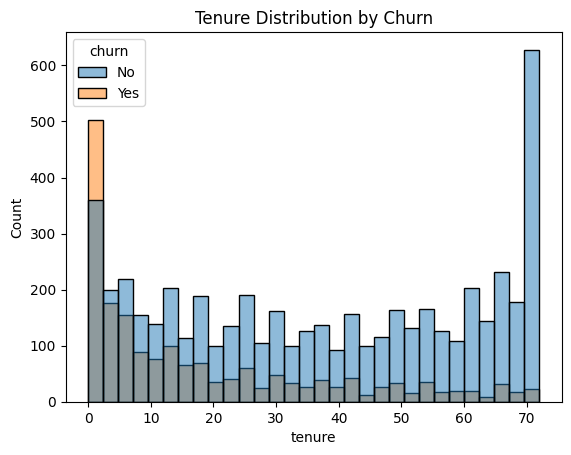

In [24]:
sns.histplot(data=df, x="tenure", hue="churn", bins=30, kde=False)
plt.title("Tenure Distribution by Churn")
plt.show()

Most churn happens within the first 12 months.

Long-tenured customers rarely leave.

4. Churn by monthly charges

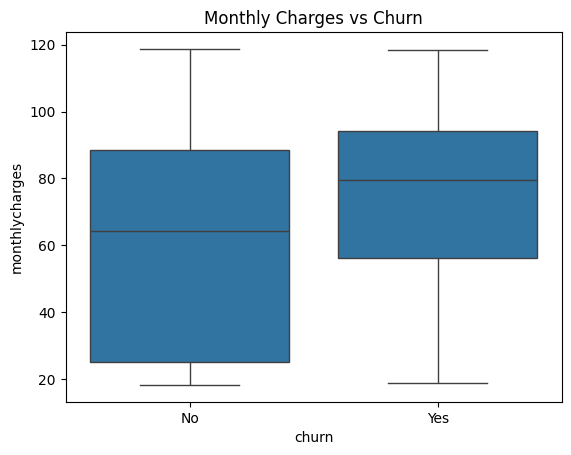

In [25]:
sns.boxplot(data=df, x="churn", y="monthlycharges")
plt.title("Monthly Charges vs Churn")
plt.show()

Customers with higher charges churn more often.

Pricing dissatisfaction may be a driver.

5. Demographics & churn

<Axes: xlabel='gender', ylabel='churn_flag'>

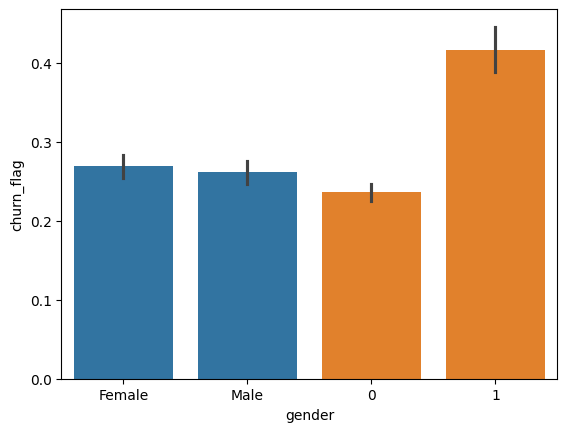

In [26]:
sns.barplot(data=df, x="gender", y="churn_flag")
sns.barplot(data=df, x="seniorcitizen", y="churn_flag")

Senior citizens churn at higher rates.

Gender differences are minimal.

6. Services & churn

<Axes: xlabel='internetservice', ylabel='churn_flag'>

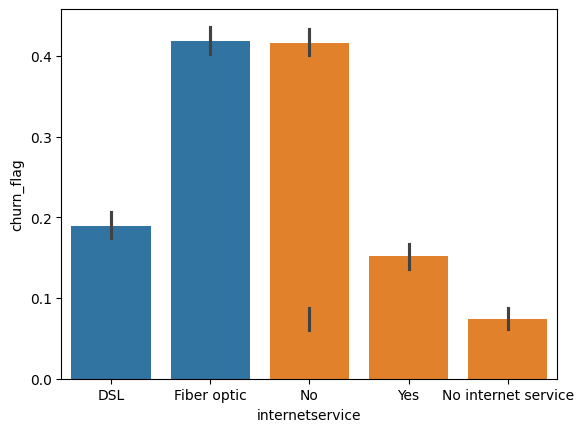

In [27]:
sns.barplot(data=df, x="internetservice", y="churn_flag")
sns.barplot(data=df, x="techsupport", y="churn_flag")

Customers without tech support churn significantly more.

Fiber optic users churn more than DSL users.

**Business Insights**

**Retention** focus should be on **new customers** and **month-to-month subscribers**.

Incentives for *longer-term contracts* can lower churn.

**Better tech support** could reduce churn.

Consider reviewing **pricing strategy** for high-charge customers.

Tailored programs for **senior citizens** may help retention.